In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/OnlineRetail.csv', encoding= 'latin1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [4]:
data.shape

(499428, 8)

#### Dropping the Description column

In [5]:
data.drop(['Description'], axis=1, inplace=True)

In [6]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


#### Renaming the StockCode column

In [7]:
data.rename(columns={'StockCode': 'SKU'}, inplace=True)

In [8]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


#### Checking the datatypes

In [9]:
data.dtypes

InvoiceNo       object
SKU             object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### Changing the data type of 'InvoiceDate' column

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [11]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Splitting the InvoceDate column into two separate columns i.e 'Date' and 'Hour'

In [12]:
data['date'] = data['InvoiceDate'].apply(lambda x: str(x).split(' '))

In [13]:
data[['Date','Hour']] = pd.DataFrame(data['date'].tolist(), index=data.index)

In [14]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Date,Hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [15]:
data['Date'] = pd.to_datetime(data['Date'])

#### Checking null values

In [18]:
data.isna().sum()

InvoiceNo           0
SKU                 0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     119449
Country             0
date                0
Date                0
Hour                0
dtype: int64

#### Dropping the null values

In [19]:
data.dropna(subset=['CustomerID'], inplace=True)

In [20]:
data.shape

(379979, 10)

#### Extracting Year and Month from Date

In [25]:
data = data.assign(Year = data['Date'].dt.year)

In [26]:
data = data.assign(Month = data['Date'].dt.month)

In [27]:
data = data.assign(Day = data['Date'].dt.day)

In [28]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Date,Hour,Year,Month,Day
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4


#### Checking Unique Months, InvoicNo and SKU

In [30]:
len(data['Month'].unique())

12

In [32]:
data['InvoiceNo'].nunique()

20482

In [33]:
data['SKU'].nunique()

3612

#### Dropping the irrelevant columns

In [34]:
data.drop(['date'], axis=1, inplace=True)

#### Analysis

In [35]:
# Revenue by Month
data['revenue'] = data['UnitPrice'] * data['Quantity']

In [36]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Hour,Year,Month,Day,revenue
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,12.5


In [37]:
# Total Revenue by Month
data_revenue = data.groupby('Month')['revenue'].sum().reset_index()

In [38]:
data_revenue

,Month,revenue
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


#### Visualization

Text(0.5, 1.0, 'Revenue per Month')

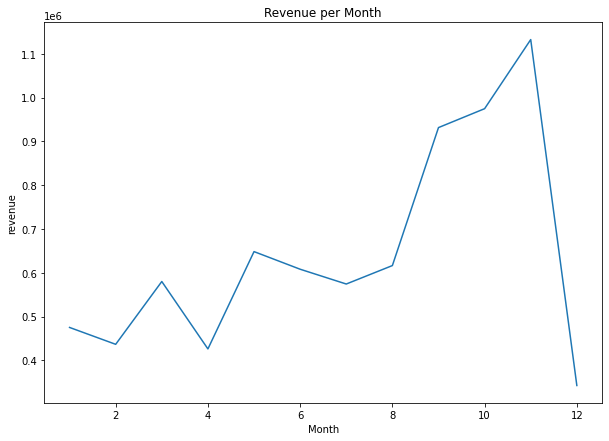

In [40]:
# Plotting Revenue by Month
fig,axes = plt.subplots(figsize=(10, 7))
ax = sns.lineplot(data=data_revenue, 
                  x='Month',
                  y='revenue')

ax.set_title('Revenue per Month')

#### Monthly Growth Rate

In [41]:
data_revenue['MonthlyGrowthRate'] = data_revenue['revenue'].pct_change()
data_revenue

,Month,revenue,MonthlyGrowthRate
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


#### Dropping the 12th Month

In [42]:
data_revenue = data_revenue.loc[data_revenue['Month'] != 12]
data_revenue

,Month,revenue,MonthlyGrowthRate
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


#### Filling the NaN value

In [46]:
data_revenue['MonthlyGrowthRate'] = data_revenue['MonthlyGrowthRate'].fillna(0)

C:\Users\Zuhair Bhati\AppData\Local\Temp\ipykernel_14532\1946845055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_revenue['MonthlyGrowthRate'] = data_revenue['MonthlyGrowthRate'].fillna(0)


In [47]:
data_revenue

,Month,revenue,MonthlyGrowthRate
0,1,475074.380,0.000000
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


Text(0.5, 1.0, 'Monthly Growth Rate')

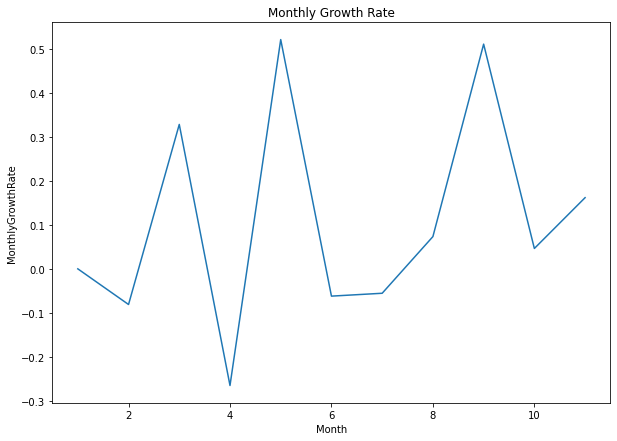

In [48]:
# Plotting Monthly Growth Rate
fig,axes = plt.subplots(figsize=(10, 7))
ax = sns.lineplot(data=data_revenue, 
                  x='Month',
                  y='MonthlyGrowthRate')

ax.set_title('Monthly Growth Rate')

#### Monthly Active Customers

In [49]:
monthly_active_customer = data.groupby('Month')['CustomerID'].nunique().reset_index()

In [50]:
monthly_active_customer

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


Text(0.5, 1.0, 'Monthly Active Customers')

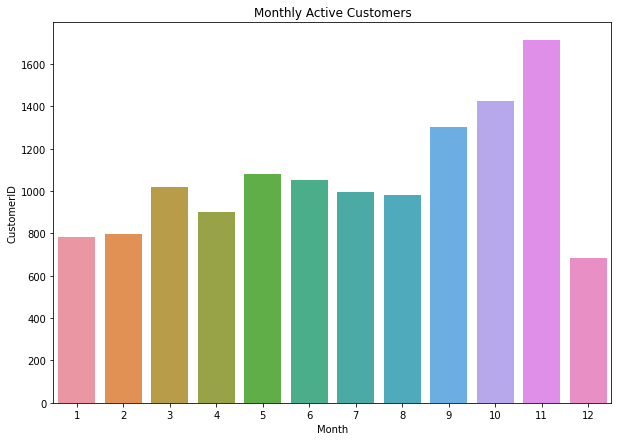

In [52]:
# Plotting Monthly Active Customers
fig,axes = plt.subplots(figsize=(10, 7))
ax = sns.barplot(data=monthly_active_customer, 
                  x='Month',
                  y='CustomerID')

ax.set_title('Monthly Active Customers')

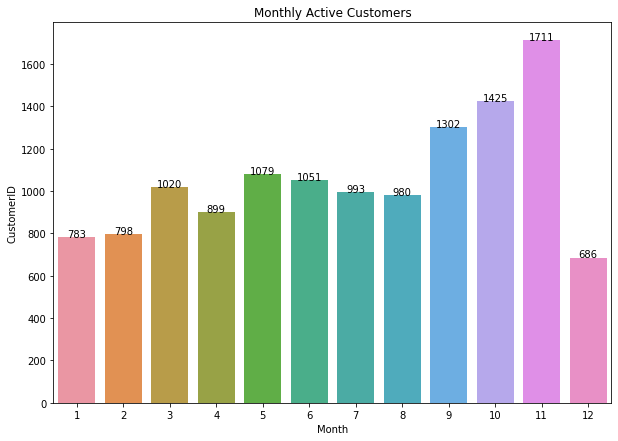

In [53]:
# Adding Data Labels to the bars

fig,axes = plt.subplots(figsize=(10, 7))
ax = sns.barplot(data=monthly_active_customer, 
                  x='Month',
                  y='CustomerID')

ax.set_title('Monthly Active Customers')

for p in ax.patches:
    height = p.get_height()
    ax.text(x= p.get_x() + (p.get_width()/2),
            y= height + 0.2,
            ha='center',
            s='{:.0f}'.format(height))

#### Unique Orders by Month

In [54]:
unique_orders = data.groupby('Month')['InvoiceNo'].nunique().reset_index()

In [55]:
unique_orders

,Month,InvoiceNo
0,1,1236
1,2,1202
2,3,1619
3,4,1384
4,5,1849
5,6,1707
6,7,1593
7,8,1544
8,9,2078
9,10,2263


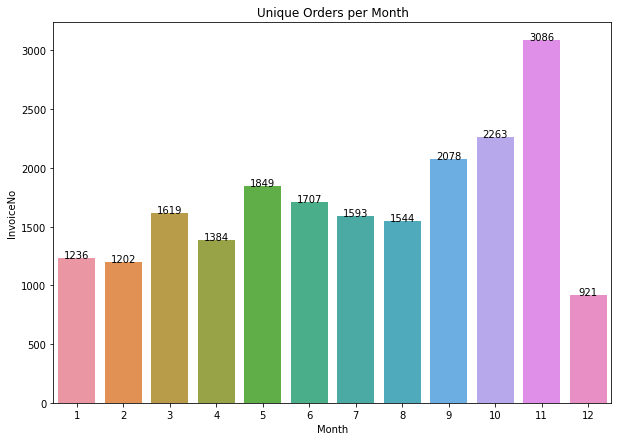

In [56]:
fig,axes = plt.subplots(figsize=(10, 7))
ax = sns.barplot(data=unique_orders, 
                  x='Month',
                  y='InvoiceNo')

ax.set_title('Unique Orders per Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x= p.get_x() + (p.get_width()/2),
            y= height + 0.2,
            ha='center',
            s='{:.0f}'.format(height))

#### Total Order Quantity per Month

In [57]:
quantity_per_month = data.groupby('Month')['Quantity'].sum().reset_index()

In [58]:
quantity_per_month

,Month,Quantity
0,1,269379
1,2,262833
2,3,344012
3,4,278585
4,5,367852
5,6,356922
6,7,363418
7,8,386612
8,9,537496
9,10,569666


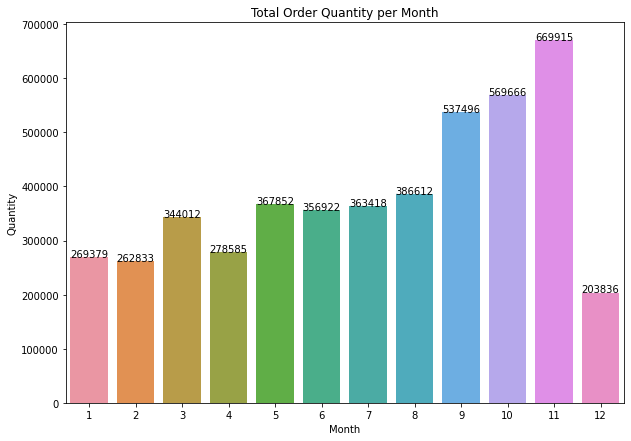

In [59]:
fig,axes = plt.subplots(figsize=(10, 7))
ax = sns.barplot(data=quantity_per_month, 
                  x='Month',
                  y='Quantity')

ax.set_title('Total Order Quantity per Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x= p.get_x() + (p.get_width()/2),
            y= height + 0.2,
            ha='center',
            s='{:.0f}'.format(height))

#### Average Revenue per Month

In [60]:
avg_revenue = data.groupby('Month')['revenue'].mean().reset_index()

In [61]:
avg_revenue

,Month,revenue
0,1,21.681014
1,2,21.438204
2,3,20.845540
3,4,18.365715
4,5,22.424626
5,6,21.842691
6,7,20.879881
7,8,22.282120
8,9,22.817118
9,10,19.224846


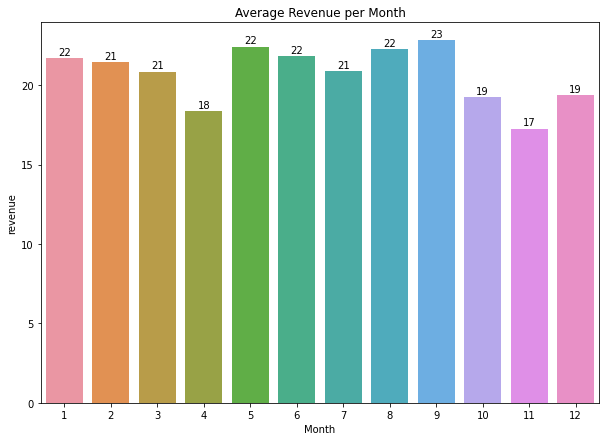

In [62]:
fig,axes = plt.subplots(figsize=(10, 7))
ax = sns.barplot(data=avg_revenue, 
                  x='Month',
                  y='revenue')

ax.set_title('Average Revenue per Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x= p.get_x() + (p.get_width()/2),
            y= height + 0.2,
            ha='center',
            s='{:.0f}'.format(height))

In [64]:
min_date_purchase = data.groupby('CustomerID').Date.min().reset_index()

In [65]:
min_date_purchase

,CustomerID,Date
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-08-05
4242,18283.0,2011-01-06


In [66]:
min_date_purchase.columns = ['CustomerID', 'MinPurchaseDate']

In [67]:
min_date_purchase['MinPurchaseMonth'] = min_date_purchase['MinPurchaseDate'].map(lambda date: date.month)

In [68]:
min_date_purchase

,CustomerID,MinPurchaseDate,MinPurchaseMonth
0,12346.0,2011-01-18,1
1,12347.0,2011-01-26,1
2,12348.0,2011-01-25,1
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2
...,...,...,...
4239,18280.0,2011-03-07,3
4240,18281.0,2011-06-12,6
4241,18282.0,2011-08-05,8
4242,18283.0,2011-01-06,1


In [69]:
data = pd.merge(data, min_date_purchase, on='CustomerID')

In [70]:
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Hour,Year,Month,Day,revenue,MinPurchaseDate,MinPurchaseMonth
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,19.50,2011-01-04,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,12.50,2011-01-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,15.00,2011-12-09,12
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,24.96,2011-12-09,12


In [71]:
data['UserType'] = 'New'
data.loc[data['Month']>data['MinPurchaseMonth'],'UserType'] = 'Existing'

In [72]:
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Hour,Year,Month,Day,revenue,MinPurchaseDate,MinPurchaseMonth,UserType
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,19.50,2011-01-04,1,New
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,4,12.50,2011-01-04,1,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,15.00,2011-12-09,12,New
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,24.96,2011-12-09,12,New


#### Revenue by User Type

In [73]:
user_type_revenue = data.groupby(['Month','UserType'])['revenue'].sum().reset_index()

In [74]:
user_type_revenue

,Month,UserType,revenue
0,1,New,475074.380
1,2,Existing,222645.040
2,2,New,213901.110
3,3,Existing,356562.750
4,3,New,223401.860
5,4,Existing,283526.090
6,4,New,142521.761
7,5,Existing,518892.810
8,5,New,129358.270
9,6,Existing,508100.200


Text(0.5, 1.0, 'Revenue per Month by User-Type')

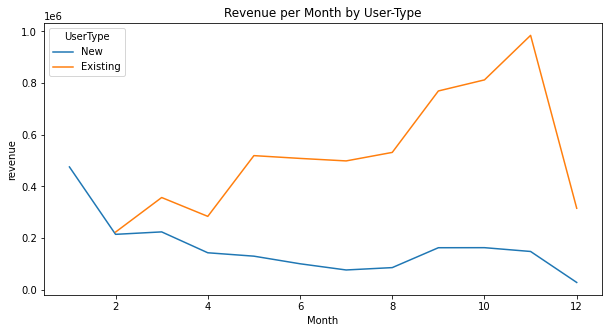

In [75]:
fig,axes = plt.subplots(figsize=(10,5))

ax = sns.lineplot(data= user_type_revenue, 
                  x='Month',
                  y='revenue',
                  hue='UserType')

ax.set_title('Revenue per Month by User-Type')